<a href="https://colab.research.google.com/github/alanjones2/medanalysis/blob/main/analysedf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/alanjones2/medanalysis/raw/main/all.csv')

dfsorted=df.sort_values('Claps', ascending=False)[:100]
dfsorted[:50]

,Unnamed: 0,Claps,Creator,Date,Image count,ReadingTime,Subtitle,Tags,Title,Topics,WordCount
388,635,27171.0,e4dc035a1f32,1.604836e+12,5.0,3.474843,For people stressed or intimidated by fitness ...,", Culture, Health, Fitness, Self Improvement, ...","How Japanese People Stay Fit for Life, Without...",", Fitness, Lifestyle, Health",700.0
1233,2258,21858.0,dcc7ed6948f1,1.599843e+12,1.0,8.713208,The heart is cruel above all things,", Friendship, Women, Relationships, This Is Us...",I Lost My Best Friend of Two Decades to Trump,", Relationships, Feminism",2256.0
1402,2594,16452.0,106a1af622a2,1.605018e+12,1.0,2.739623,"It’s too late to preach to us about peace, lov...",", Donald Trump, Joe Biden, Election 2020, Poli...",To My Facebook Friends Who Voted for Donald Trump,", Culture, Politics, Race, Election 2020, Soci...",673.0
309,485,14175.0,60d602f250ed,1.605633e+12,1.0,3.596226,Thanks for nothing — exit polls show that 55% ...,", Election 2020, White Supremacy, Human Rights...",Dear White Women Who Voted for Trump,", Politics, Feminism, Justice, Equality",900.0
588,1005,11429.0,24b3c1256d6f,1.605347e+12,1.0,4.230189,It’s close to impossible to not know about BTS...,", Bts, Music, Culture, Arts And Entertainment",BTS Are Not The Next Beatles — They’re BTS,", Music",1068.0
1005,1799,10198.0,a7b125868703,1.603015e+12,1.0,5.501887,"Find out what hoisting in JavaScript means, wi...",", JavaScript, Programming, Front End Developme...",What is Hoisting in JavaScript?,", Javascript, Programming",1405.0
870,1567,9227.0,9e422a605dc5,1.605569e+12,1.0,7.166038,I wrote my book for young people — as an invit...,", Politics, America, Barack Obama, Election 2020",I’m Not Yet Ready to Abandon the Possibility o...,", Politics, Society, Election 2020",1846.0
670,1154,8861.0,41e01d325219,1.605898e+12,1.0,9.064151,This Wasn’t Just an Election. It was a Census ...,", Life, News, Leadership, Culture, Politics",How Many American Idiots Are There? 73 Million.,", Politics, Leadership",2349.0
754,1302,8041.0,51e7eb466f57,1.606842e+12,4.0,3.892453,How Jerry Selbee thrived with a simple algebra...,", Business, Entrepreneur, Life, Humor, History",An Elderly Mathematician Hacked the Lottery fo...,", Money, Startups",846.0
934,1677,6767.0,f5c605f92c88,1.606308e+12,1.0,4.433962,"But, you’re not going to like it.",", Donald Trump, Politics, Polarization, Psycho...","Finally, An Answer To Why So Many People Voted...",", Politics, Psychology",1122.0


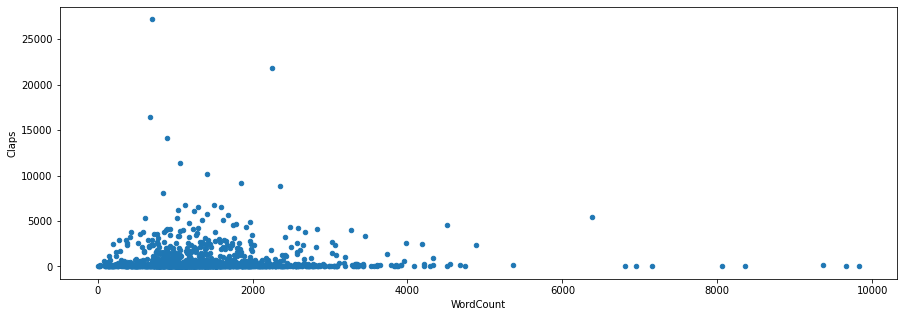

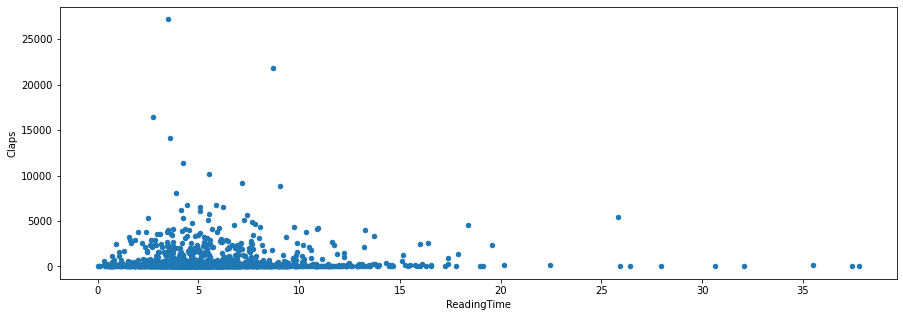

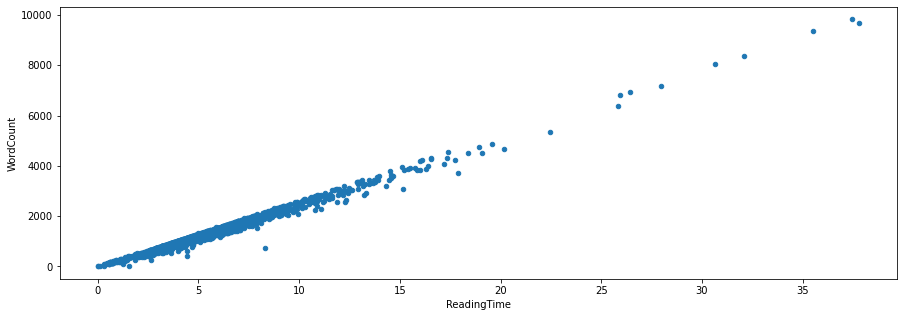

In [8]:
df.plot.scatter('WordCount','Claps',figsize=(15,5))
df.plot.scatter('ReadingTime','Claps',figsize=(15,5))
df.plot.scatter('ReadingTime','WordCount',figsize=(15,5))

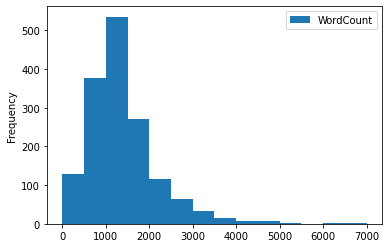

In [12]:
df.plot.hist(y='WordCount',bins=(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000))

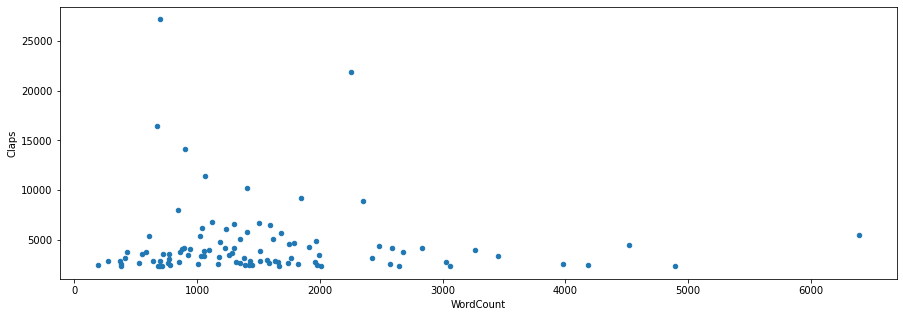

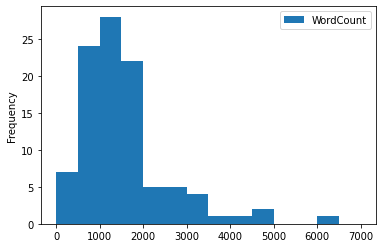

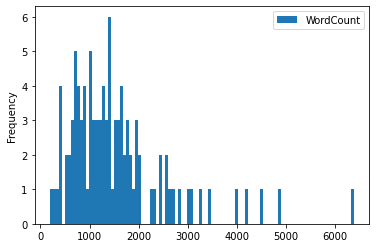

In [17]:
dfsorted.plot.scatter('WordCount','Claps',figsize=(15,5))
dfsorted.plot.hist(y='WordCount',bins=(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000))
dfsorted.plot.hist(y='WordCount',bins=100)


In [4]:
dfsorted['Topics']
topics=""
for i in dfsorted['Topics']:
    topics = topics+i
topics


', Fitness, Lifestyle, Health, Relationships, Feminism, Culture, Politics, Race, Election 2020, Social Media, Politics, Feminism, Justice, Equality, Music, Javascript, Programming, Politics, Society, Election 2020, Politics, Leadership, Money, Startups, Politics, Psychology, Relationships, Feminism, Equality, Coronavirus, Politics, Society, Race, Self, Gun Control, Family, Equality, Religion, Politics, Politics, Society, Election 2020, Feminism, Equality, Politics, Race, Election 2020, Gaming, Culture, LGBTQIA, Gaming, Media, Politics, Politics, Society, Election 2020, Justice, Race, Money, Marketing, Social Media, Nonfiction, Family, Coronavirus, Mental Health, Science, Neuroscience, Health, Productivity, Work, LGBTQIA, Equality, Science, Programming, Technology, Politics, Film, Family, Media, Marketing, Visual Design, Design, UX, Gaming, Marketing, Business, History, Sexuality, Feminism, Sexuality, Culture, Humor, Equality, TV, Spirituality, Fitness, Mental Health, Psychology, Self, 

76
Politics         17
Equality         14
Culture          11
Marketing        10
Feminism         10
Society           9
Race              8
Self              8
Election 2020     7
Work              7
Money             7
Technology        6
Writing           6
Productivity      6
Family            6
Science           5
Design            5
Startups          5
Business          5
Mental Health     5
dtype: int64


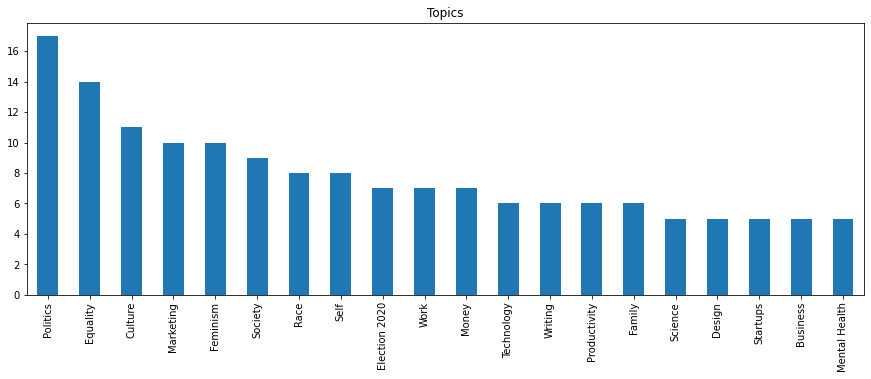

In [5]:
 
counts = dict()
words = topics.split(", ")
 
for word in words:
  if word in counts:
    counts[word] += 1
  else:
    counts[word] = 1
 
counts
 
t = pd.Series(counts).sort_values(ascending=False)
print(len(t))
print(t[:20])
t[:20].plot.bar(figsize=(15,5),title="Topics");

, Poetry, Short Story, Photography, Poetry On Medium, Ps I Love You, Poetry, Cats, Awareness, Birds, Stories, Poetry, Nature, Spirituality, Mindfulness, Life Lessons, Poetry, Poetry Sunday, Self Improvement, Mental Health, Personal Development, Haiku, Poetry, Landscape, Love, Yellow, Poetry, Blue Insights, Life, Autumn, Thoughts, Autumn, Poetry, Writing Prompts, Life, The Junction, Poetry, Free Verse, LGBTQ, Loneliness, Family, Poetry, Abortion, Children, Loss, Life, Societal Pressures, Cultural Assimilation, Originality, Faith and Life, Moments, Poetry, Self, Creative Writing, Life, Life Lessons, Poetry, Mental Health, Spirituality, Poetry On Medium, Energy, Poetry, Race, BlackLivesMatter, Slavery, Identity, Poetry, Poetry On Medium, Self-awareness, Meaning, Food, Poetry, Eternity, Soul, Humanity, Spirituality, Poetry, Music, Travel, Self, Ghazal, Sri Aurobindo, Yoga, Poetry, Poetry On Medium, Poetry Writing, Poetry, Sex, Mourning, Grief, Relationships, Poetry, Lyrics, Christmas, 2020

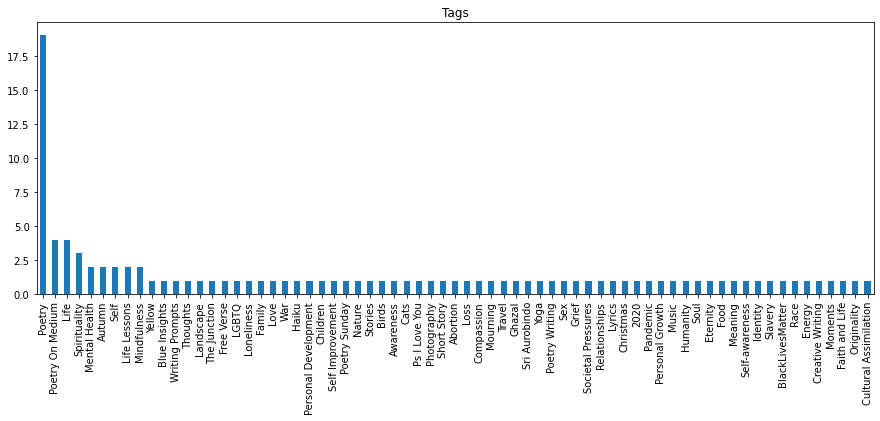

In [6]:
"""
tags=""
for i in df['Tags'][:20]:
    tags = tags+str(i)
print(tags) 
counts = dict()
words = tags.split(", ")
 
for word in words:
  if word in counts:
    counts[word] += 1
  else:
    counts[word] = 1
 
counts
t = pd.Series(counts).sort_values(ascending=False)
print(len(t))
print(t[:20])
t[:-1].plot.bar(figsize=(15,5),title="Tags");
"""

In [104]:
import requests
import json

def makecreators():
  creators = pd.DataFrame()
  for c in dfsorted['Creator']:
    #print(c)
    url=f'https://medium.com/search/users?q={c}&format=json'
    r = requests.get(url)
    creator=json.loads(r.text[16:])
    #print(creator['payload']['value'][0]['name'])
    #print(creator['payload']['value'][0]['bio'])
   
    creators=creators.append({'id':c,'name':creator['payload']['value'][0]['name'] ,'bio':creator['payload']['value'][0]['bio']},ignore_index=True)
  return creators
#creators=makecreators()


In [80]:
#creators.to_csv('creators.csv')

creators2 = pd.read_csv('https://raw.githubusercontent.com/alanjones2/medanalysis/main/creators.csv')
creators2

,Unnamed: 0,bio,id,name
0,0,Raised in Tokyo; living in the US. I care abou...,e4dc035a1f32,Kaki Okumura
1,1,Marketing Exec/Author. I build brands & tell s...,dcc7ed6948f1,Felicia C. Sullivan
2,2,Brother Son Husband Friend Loner Minimalist Wo...,106a1af622a2,Jeremy Helligar
3,3,Lara Henneman is a storyteller who writes abou...,60d602f250ed,Lara Henneman
4,4,20 year old writer who thinks a little too muc...,24b3c1256d6f,fawzul himaya hareed
...,...,...,...,...
95,95,"Words in Forge, Marker, Debugger, Business Ins...",58c587b768b6,Stephen Moore
96,96,Aussie Blogger with 100M+ views — Writer for C...,b6d641be1066,Tim Denning
97,97,NaN,8485de26470d,Harry Khan
98,98,"Founder of Blendle, University of the Netherlands",8ba55ab4d1c9,Alexander Klöpping


In [109]:
names = creators2['name'].value_counts()
n =pd.DataFrame(names)
n

,name
Tim Denning,6
Sean Kernan,5
umair haque,3
Kaki Okumura,2
Bonsu Thompson,2
...,...
Vincent Carlos,1
Joe Forrest,1
Bob Wuest,1
Insider,1
